# Kaggle Heart Disease UCI
- Author: Max Kuan
- Date: 2022.02.16
- Source: https://www.kaggle.com/ronitf/heart-disease-uci

In [34]:
import pandas as pd
import numpy as np
import logging
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
def columnType(df):
    numeric = list()
    category = list()
    
    for i in df.columns:
        # binary value in the column
        if len(df[i].unique()) == 2:
            df[i] = df[i].astype("category")
            category.append(i)
        else:
            numeric.append(i)
    return (df, category, numeric)

In [41]:
def rowCleaning(df):
    
    # check duplicated row
    print(f"Number of duplicated row: {df.duplicated().sum()}, Index: {df[df.duplicated(keep=False)].index.tolist()}")
    df = df.drop_duplicates()
    print(f"Dropped duplicated row, number of duplicated row {df.duplicated().sum()}")
    
    # check null value
    print(f"""Number of Null value in the column: 
          {df.isnull().sum()}""")
    
    return df    

In [35]:
data = pd.read_csv("heart.csv")

In [36]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


This dataset contain 303 rows and 14 columns. Feature include
- age
- sex
- cp: chest pain type (4 values)
- trestbps: resting blood pressure
- chol: serum cholestoral in mg/dl
- fbs: fasting blood sugar > 120 mg/dl
- restecg: resting electrocardiographic results (values 0,1,2)
- thalach: maximum heart rate achieved
- exang: exercise induced angina
- oldpeak: ST depression induced by exercise relative to rest
- slope: The slope of the peak exercise ST segment
- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
- target: target for heart disease

In [37]:
data.shape

(303, 14)

In [38]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Next, seperate categorical and numerical features. In this dataset there are several features were binary, which can be see as categorical features. Hence, the categorical features include, sex, fbs, exang, target.

In [42]:
data, categorical, numerical = columnType(data)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   age       303 non-null    int64   
 1   sex       303 non-null    category
 2   cp        303 non-null    int64   
 3   trestbps  303 non-null    int64   
 4   chol      303 non-null    int64   
 5   fbs       303 non-null    category
 6   restecg   303 non-null    int64   
 7   thalach   303 non-null    int64   
 8   exang     303 non-null    category
 9   oldpeak   303 non-null    float64 
 10  slope     303 non-null    int64   
 11  ca        303 non-null    int64   
 12  thal      303 non-null    int64   
 13  target    303 non-null    category
dtypes: category(4), float64(1), int64(9)
memory usage: 25.5 KB


In [44]:
print(f"Categorical features : {categorical}")
print(f"Numerical features : {numerical}")

Categorical features : ['sex', 'fbs', 'exang', 'target']
Numerical features : ['age', 'cp', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope', 'ca', 'thal']


Statistical analysis

In [45]:
data.describe()

,age,cp,trestbps,chol,restecg,thalach,oldpeak,slope,ca,thal
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.966997,131.623762,246.264026,0.528053,149.646865,1.039604,1.399340,0.729373,2.313531
std,9.082101,1.032052,17.538143,51.830751,0.525860,22.905161,1.161075,0.616226,1.022606,0.612277
min,29.000000,0.000000,94.000000,126.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,120.000000,211.000000,0.000000,133.500000,0.000000,1.000000,0.000000,2.000000
50%,55.000000,1.000000,130.000000,240.000000,1.000000,153.000000,0.800000,1.000000,0.000000,2.000000
75%,61.000000,2.000000,140.000000,274.500000,1.000000,166.000000,1.600000,2.000000,1.000000,3.000000
max,77.000000,3.000000,200.000000,564.000000,2.000000,202.000000,6.200000,2.000000,4.000000,3.000000


In [46]:
data.describe(include=['category', "O"])

,sex,fbs,exang,target
count,303,303,303,303
unique,2,2,2,2
top,1,0,0,1
freq,207,258,204,165


In [47]:
data = rowCleaning(data)

Number of duplicated row: 1, Index: [163, 164]
Dropped duplicated row, number of duplicated row 0
Number of Null value in the column: 
          age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


Text(0.5, 1.0, 'class number')

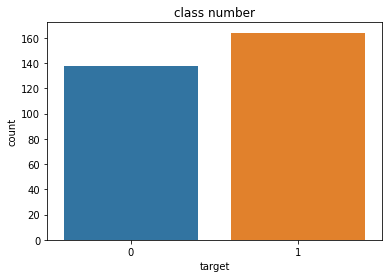

In [76]:
sns.countplot(data=data, x='target')
plt.title("class number")

Text(0.5, 1.0, 'class number')

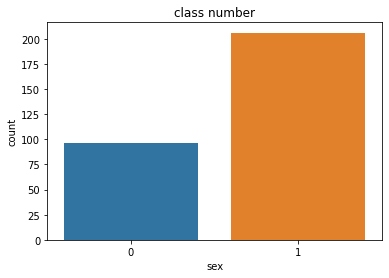

In [102]:
sns.countplot(data=data, x='sex')
plt.title("class number")

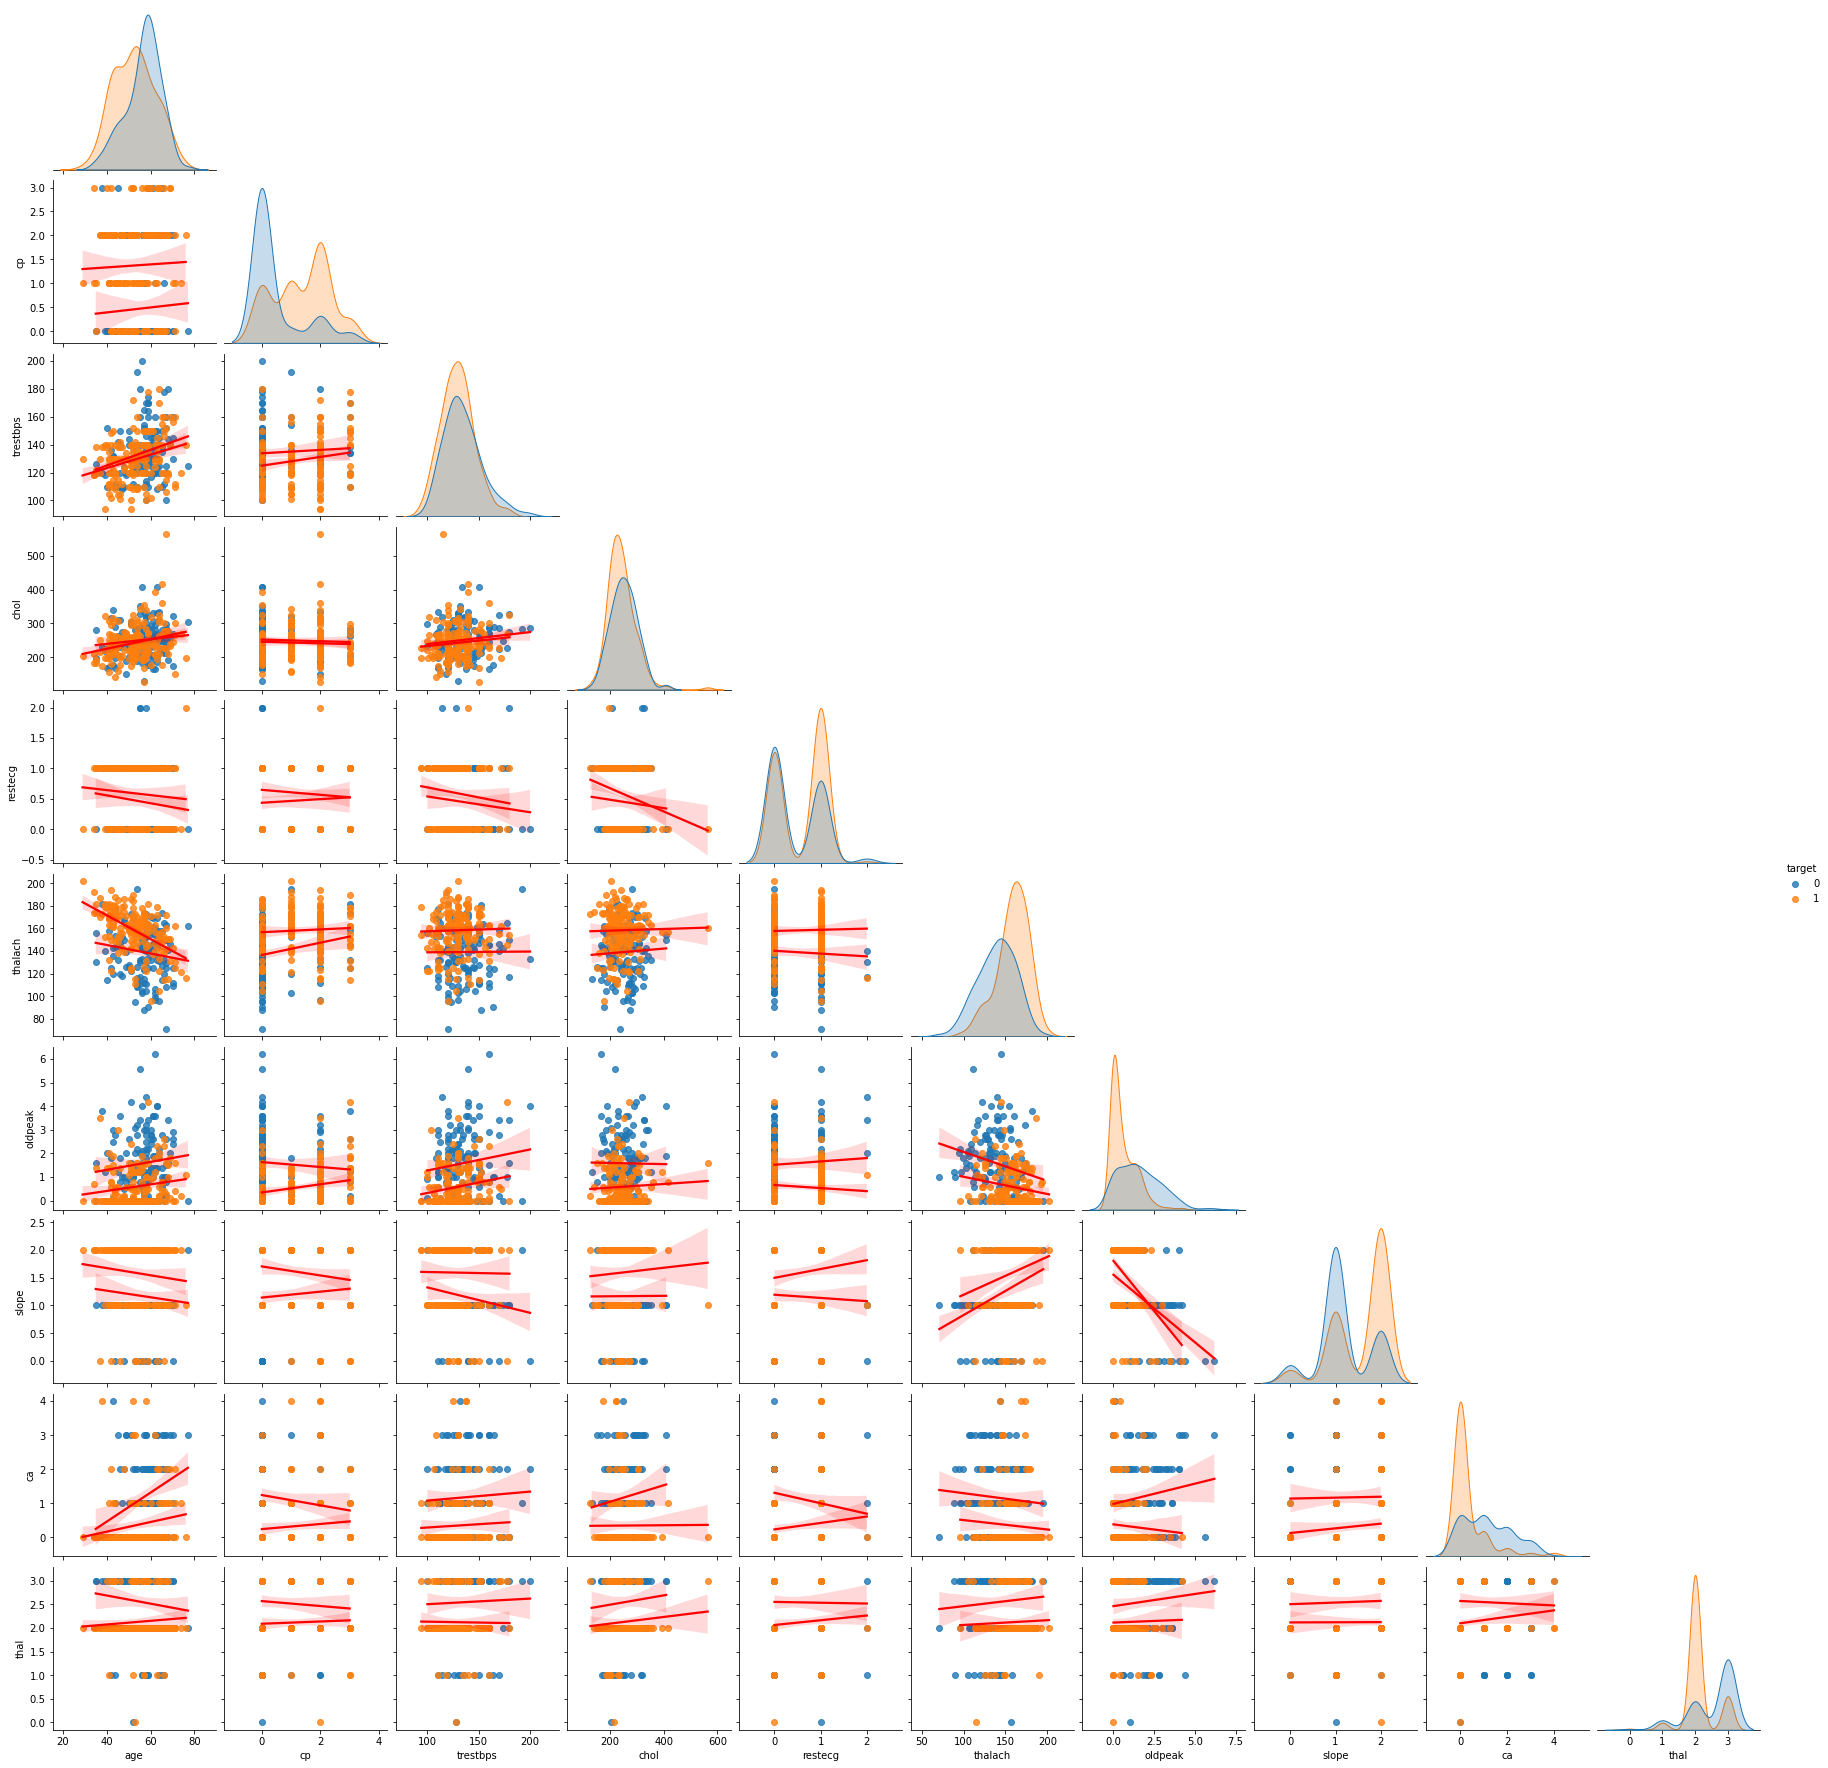

In [100]:
sns.pairplot(data=data, hue='target', kind="reg", plot_kws={'line_kws':{'color':'red'}}, corner=True)

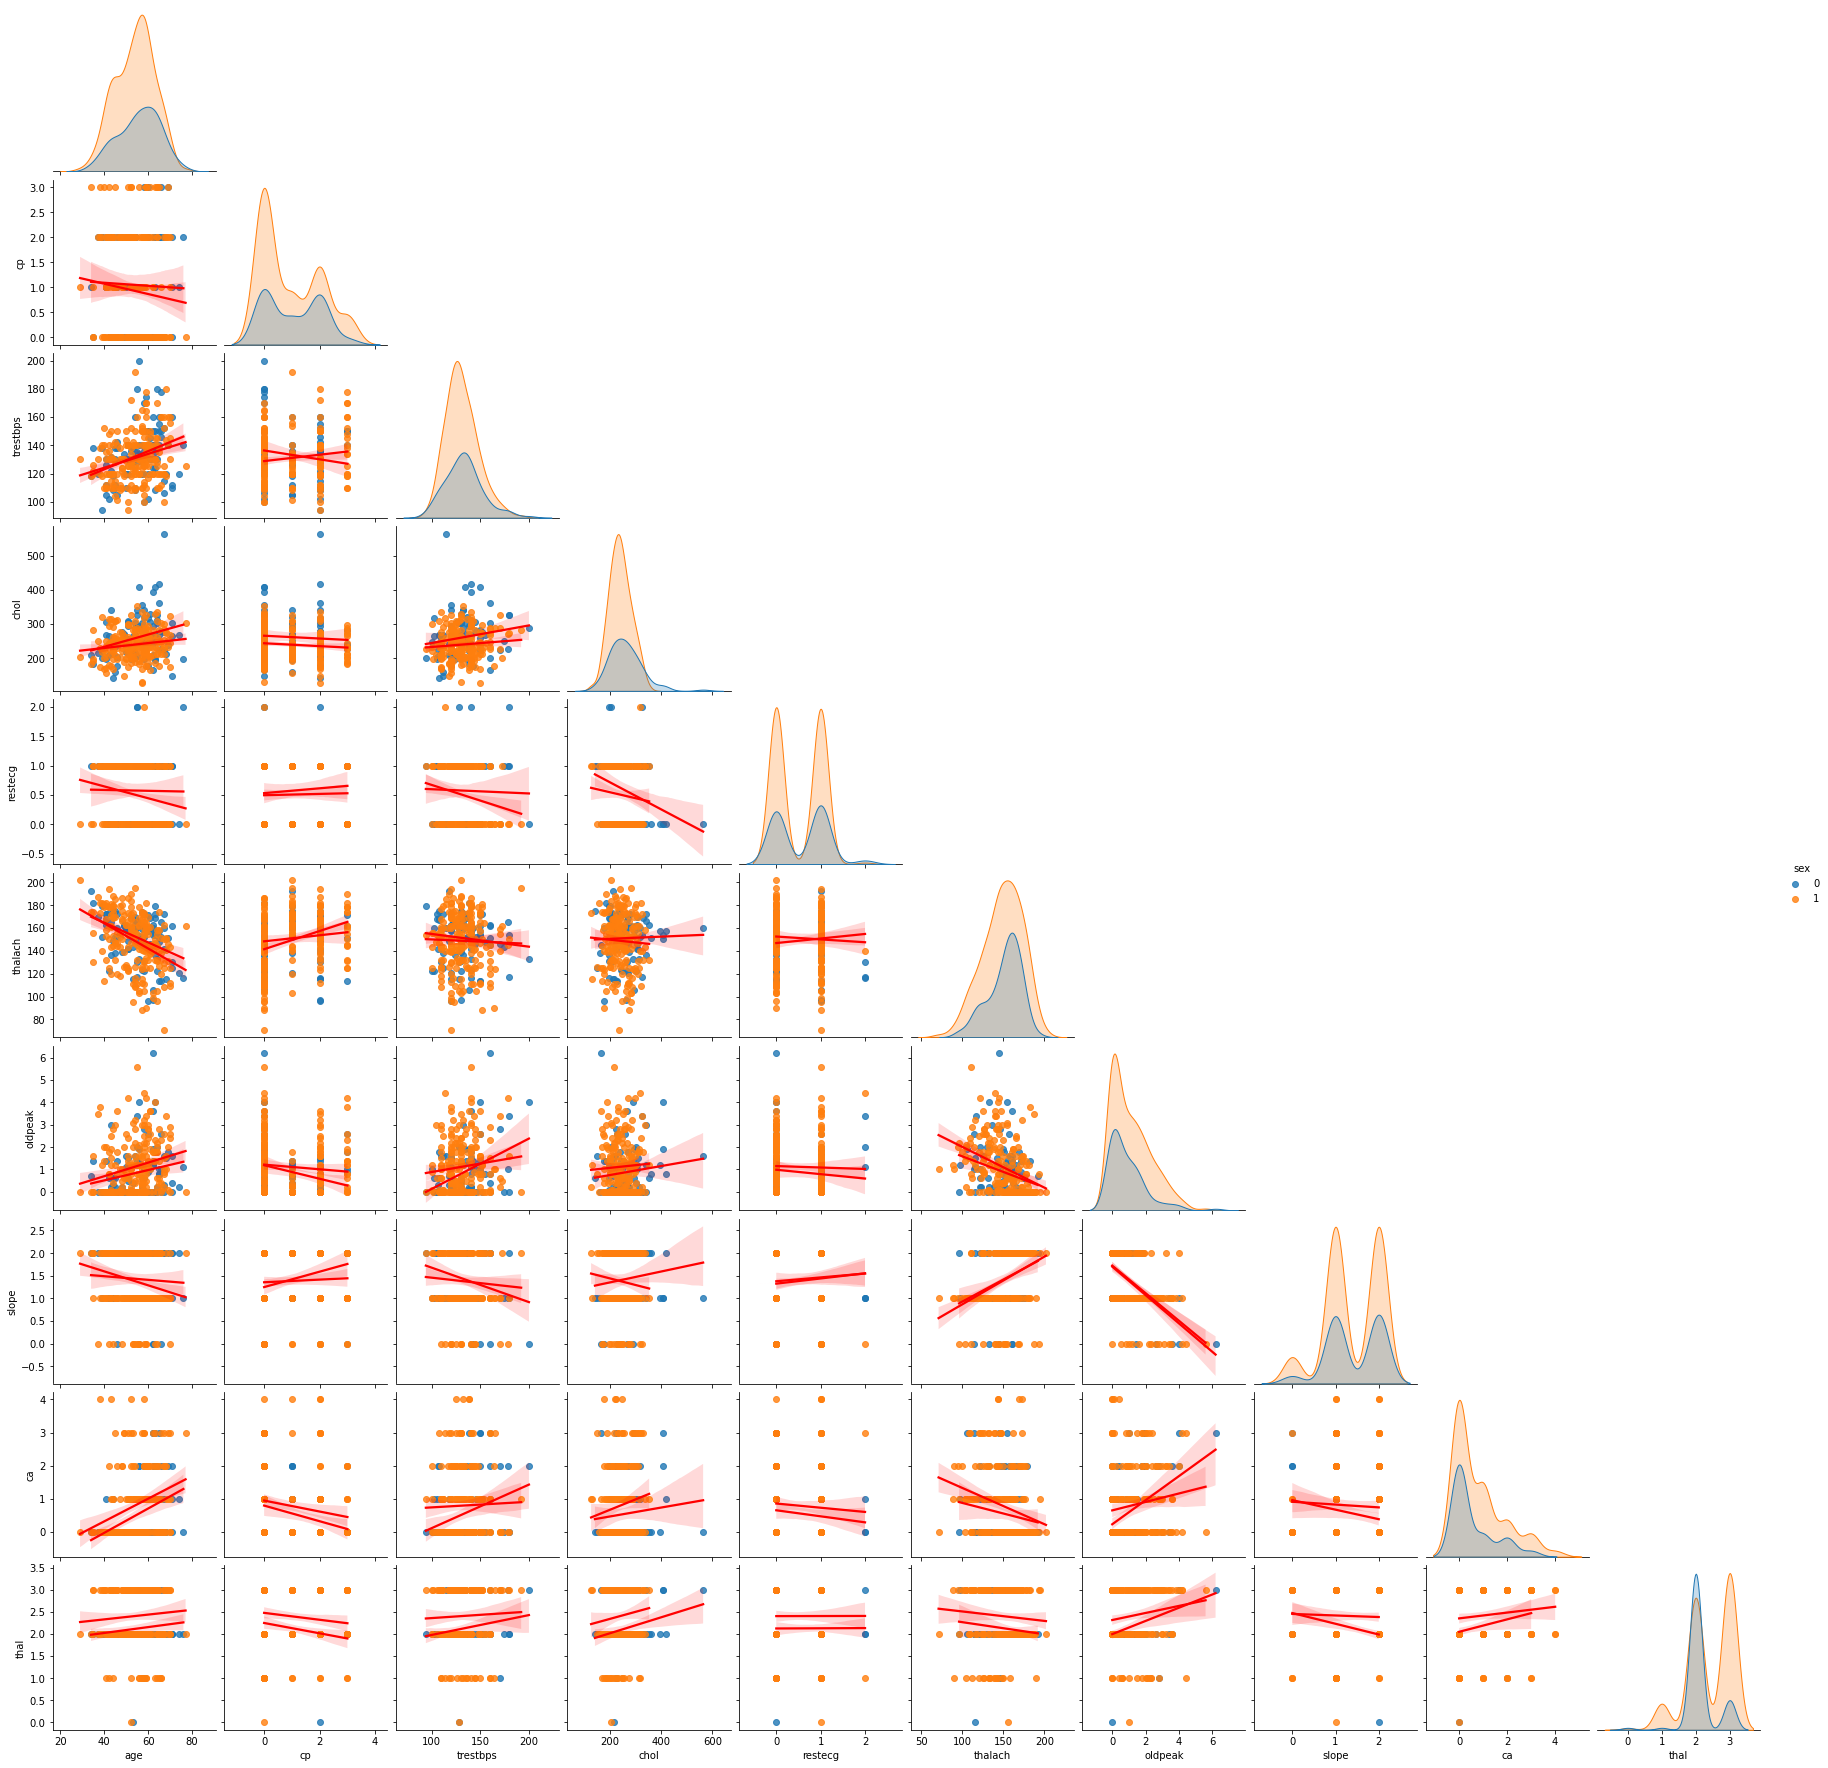

In [101]:
sns.pairplot(data=data, hue='sex', kind="reg", plot_kws={'line_kws':{'color':'red'}}, corner=True)

<AxesSubplot:>

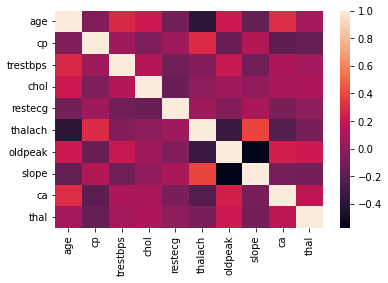

In [109]:
sns.heatmap(data=data.corr())